In [1]:
!pip install textract

In [58]:
import os
import re
import nltk
nltk.download('stopwords')
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Data upload

In [3]:
resume_data = pd.read_csv('resume_data.csv')
resume_data

,Resume_Category,Raw Details,Category_num
0,Intership,b'Name: Ravali P \n\n\n\n ...,0
1,Intership,b'SUSOVAN BAG \n\nSeeking a challenging ...,0
2,Peoplesoft,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,1
3,Peoplesoft,b'G. Ananda Rayudu \n\n\t\t https://www....,1
4,Peoplesoft,b'PeopleSoft Database Administrator\n\n ...,1
...,...,...,...
74,Workday,"b""Workday Integration Consultant\n\n\n\nName ...",4
75,Workday,b'Srikanth (WORKDAY hCM Consultant)\t ...,4
76,Workday,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,4
77,Workday,b'Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consu...,4


In [4]:
resume_data[resume_data.Resume_Category == 'Workday']

,Resume_Category,Raw Details,Category_num
58,Workday,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...,4
59,Workday,b'Name : Gopi Krishna Reddy\n\n\t\t\t\...,4
60,Workday,"b""Hari Krishna M\n\n\n\n\n\nSummary:\n\nA resu...",4
61,Workday,"b""Harikrishna Akula ...",4
62,Workday,b'HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n...,4
63,Workday,b'G Himaja\n\n ...,4
64,Workday,"b""Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSION...",4
65,Workday,b'JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SU...,4
66,Workday,b'Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE S...,4
67,Workday,b'Mooraboyina Guravaiah\n\nWorkday Integration...,4


In [5]:
resume_data.isnull().sum()

Resume_Category    0
Raw Details        0
Category_num       0
dtype: int64

##### Word count

In [6]:
resume_data['Word_Count'] = resume_data['Raw Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw Details','Word_Count']].head()

,Raw Details,Word_Count
0,b'Name: Ravali P \n\n\n\n ...,1795
1,b'SUSOVAN BAG \n\nSeeking a challenging ...,533
2,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,1023
3,b'G. Ananda Rayudu \n\n\t\t https://www....,1451
4,b'PeopleSoft Database Administrator\n\n ...,1346


### Character count

In [7]:
resume_data['Char_Count'] = resume_data['Raw Details'].str.len() ## this also includes spaces
resume_data[['Raw Details','Char_Count']].head()

,Raw Details,Char_Count
0,b'Name: Ravali P \n\n\n\n ...,7704
1,b'SUSOVAN BAG \n\nSeeking a challenging ...,2022
2,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,8487
3,b'G. Ananda Rayudu \n\n\t\t https://www....,9158
4,b'PeopleSoft Database Administrator\n\n ...,7336


#### stopwords count

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw Details','Stopwords']].head()

,Raw Details,Stopwords
0,b'Name: Ravali P \n\n\n\n ...,65
1,b'SUSOVAN BAG \n\nSeeking a challenging ...,39
2,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,190
3,b'G. Ananda Rayudu \n\n\t\t https://www....,186
4,b'PeopleSoft Database Administrator\n\n ...,177


#### Number of Numerics

In [9]:
resume_data['Numerics'] = resume_data['Raw Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw Details','Numerics']].head()

,Raw Details,Numerics
0,b'Name: Ravali P \n\n\n\n ...,6
1,b'SUSOVAN BAG \n\nSeeking a challenging ...,0
2,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,3
3,b'G. Ananda Rayudu \n\n\t\t https://www....,4
4,b'PeopleSoft Database Administrator\n\n ...,3


In [10]:
resume_data

,Resume_Category,Raw Details,Category_num,Word_Count,Char_Count,Stopwords,Numerics
0,Intership,b'Name: Ravali P \n\n\n\n ...,0,1795,7704,65,6
1,Intership,b'SUSOVAN BAG \n\nSeeking a challenging ...,0,533,2022,39,0
2,Peoplesoft,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,1,1023,8487,190,3
3,Peoplesoft,b'G. Ananda Rayudu \n\n\t\t https://www....,1,1451,9158,186,4
4,Peoplesoft,b'PeopleSoft Database Administrator\n\n ...,1,1346,7336,177,3
...,...,...,...,...,...,...,...
74,Workday,"b""Workday Integration Consultant\n\n\n\nName ...",4,904,7398,194,3
75,Workday,b'Srikanth (WORKDAY hCM Consultant)\t ...,4,1063,7067,194,9
76,Workday,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,4,1076,8791,235,4
77,Workday,b'Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consu...,4,1031,7186,192,5


#### Text preprocessing

In [11]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [12]:
resume_data = pd.read_csv('resume_data.csv')
resume_data['Resume_Details'] = resume_data['Raw Details'].apply(lambda x: preprocess(x))

### clean text from resume and saving to new csv


In [13]:
resume_data

,Resume_Category,Raw Details,Category_num,Resume_Details
0,Intership,b'Name: Ravali P \n\n\n\n ...,0,name ravali curriculum vitae specialization co...
1,Intership,b'SUSOVAN BAG \n\nSeeking a challenging ...,0,susovan bag nseeking challenging position fiel...
2,Peoplesoft,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,1,anubhav kumar singh ncore competencies nscript...
3,Peoplesoft,b'G. Ananda Rayudu \n\n\t\t https://www....,1,ananda rayudu ananda rayudu summary years expe...
4,Peoplesoft,b'PeopleSoft Database Administrator\n\n ...,1,peoplesoft database administrator ngangareddy ...
...,...,...,...,...
74,Workday,"b""Workday Integration Consultant\n\n\n\nName ...",4,workday integration consultant nname sri krish...
75,Workday,b'Srikanth (WORKDAY hCM Consultant)\t ...,4,srikanth workday hcm consultant nseeking suita...
76,Workday,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,4,workday hcm fcm nname kumar nrole workday cons...
77,Workday,b'Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consu...,4,venkateswarlu tworkday consultant nprofessiona...


In [14]:
resume_data.drop(['Raw Details'], axis = 1, inplace = True)
resume_data

,Resume_Category,Category_num,Resume_Details
0,Intership,0,name ravali curriculum vitae specialization co...
1,Intership,0,susovan bag nseeking challenging position fiel...
2,Peoplesoft,1,anubhav kumar singh ncore competencies nscript...
3,Peoplesoft,1,ananda rayudu ananda rayudu summary years expe...
4,Peoplesoft,1,peoplesoft database administrator ngangareddy ...
...,...,...,...
74,Workday,4,workday integration consultant nname sri krish...
75,Workday,4,srikanth workday hcm consultant nseeking suita...
76,Workday,4,workday hcm fcm nname kumar nrole workday cons...
77,Workday,4,venkateswarlu tworkday consultant nprofessiona...


In [15]:
resume_data.to_csv('Clean_resumes.csv', index = False)

In [16]:
resume_data = pd.read_csv('Clean_resumes.csv')
resume_data

,Resume_Category,Category_num,Resume_Details
0,Intership,0,name ravali curriculum vitae specialization co...
1,Intership,0,susovan bag nseeking challenging position fiel...
2,Peoplesoft,1,anubhav kumar singh ncore competencies nscript...
3,Peoplesoft,1,ananda rayudu ananda rayudu summary years expe...
4,Peoplesoft,1,peoplesoft database administrator ngangareddy ...
...,...,...,...
74,Workday,4,workday integration consultant nname sri krish...
75,Workday,4,srikanth workday hcm consultant nseeking suita...
76,Workday,4,workday hcm fcm nname kumar nrole workday cons...
77,Workday,4,venkateswarlu tworkday consultant nprofessiona...


In [17]:
resume_data.Resume_Details[5]

'classification internal nclassification internal tmurali texperience summary years experience working peoplesoft administration performing various infrastructure related activities peoplesoft environments ninstalled configured peoplesoft web server application server database server process scheduler nserver windows unix linux platforms ncreating domains web server application server process scheduler server napplied patches manually applied maintenance packs change assistant tool nexperience dpks installations napplying tax updates fixes using pum nmigrating projects one environment another environment using application designer also capi stat tools nperformed single sign sso implementation nexperience running compare reports pre post migrations nexperience setting client workstation developers testers ninvolved configuration integration broker setting modules sending messages ninvolved production support client ninvolved running audit reports dddaudit sysaudit integrity checks nexpe

#### NER Name Entity Recognisation

In [19]:
!pip install nltk
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('using', 389), ('application', 389), ('peoplesoft', 367), ('server', 356), ('workday', 349), ('experience', 341), ('data', 322), ('reports', 321), ('business', 270), ('sql', 259), ('process', 236), ('web', 219), ('database', 210), ('nexperience', 198), ('system', 192), ('knowledge', 189), ('integrations', 185), ('integration', 178), ('tools', 178), ('like', 175), ('support', 173), ('hcm', 165), ('development', 160), ('services', 156), ('skills', 154), ('nproject', 154), ('servers', 152), ('testing', 149), ('various', 146), ('report', 144), ('people', 140), ('team', 139), ('creating', 139), ('management', 135), ('security', 133), ('project', 132), ('issues', 132), ('production', 131), ('developer', 131), ('eib', 130), ('studio', 128), ('client', 126), ('custom', 124), ('nworked', 119), ('oracle', 117), ('domains', 115), ('design', 115), ('core', 114), ('applications', 112), ('new', 112)]


### Part of Speech Tagging POS

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg

In [23]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [24]:
for token in doc_block[:30]:
    print(token,token.pos_)

ormalization NOUN
njava ADV
skills VERB
good ADJ
knowledge NOUN
method NOUN
overloading NOUN
method NOUN
overriding VERB
good ADJ
understanding NOUN
static ADJ
nonstatic ADJ
good ADJ
understanding NOUN
variables NOUN
good ADJ
knowledge NOUN
constructor NOUN
good ADJ
knowledge NOUN
abstraction NOUN
good ADJ
knowledge NOUN
encapsulation NOUN
good ADJ
knowledge NOUN
inheritance NOUN
good ADJ
knowledge NOUN


### Filtering out only the Nouns and Verbs from the Text to Tokens

In [25]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['specialization', 'computer', 'science', 'utilize', 'skills', 'achieving', 'target', 'developing', 'performance', 'organization', 'nion', 'nion', 'passing', 'examination', 'testing', 'skills', 'knowledge', 'sdlc', 'concepts', 'knowledge', 'testing', 'knowledge', 'testing', 'integration', 'testing', 'knowledge', 'system', 'testing', 'knowledge', 'testing', 'reliability', 'testing', 'knowledge', 'testing', 'knowledge', 'stlc', 'concepts', 'knowledge', 'test', 'cases', 'test', 'scenarios', 'knowledge', 'globalization', 'testing', 'compatibility', 'testing', 'knowledge', 'regression', 'testing', 'knowledge', 'test', 'plan', 'methdology', 'knowledge', 'methodology', 'expertise', 'sprint', 'planning', 'meeting', 'knowledge', 'scrum', 'meeting', 'knowledge', 'sprint', 'meeting', 'knowledge', 'product', 'backlog', 'meeting', 'bug', 'triage', 'meeting', 'knowledge', 'normalization', 'skills', 'knowledge', 'method', 'overloading', 'method', 'overriding', 'understanding', 'understanding', 'varia

### Counting all the Nouns and Verbs present in the Tokens of words

In [26]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,application,386
1,using,381
2,reports,321
3,data,290
4,workday,274
5,experience,268
6,business,254
7,process,231
8,server,230
9,web,202


### Visualizing the Result of Top 20 Nouns and Verbs most Frequently

In [33]:
!mkdir IMG

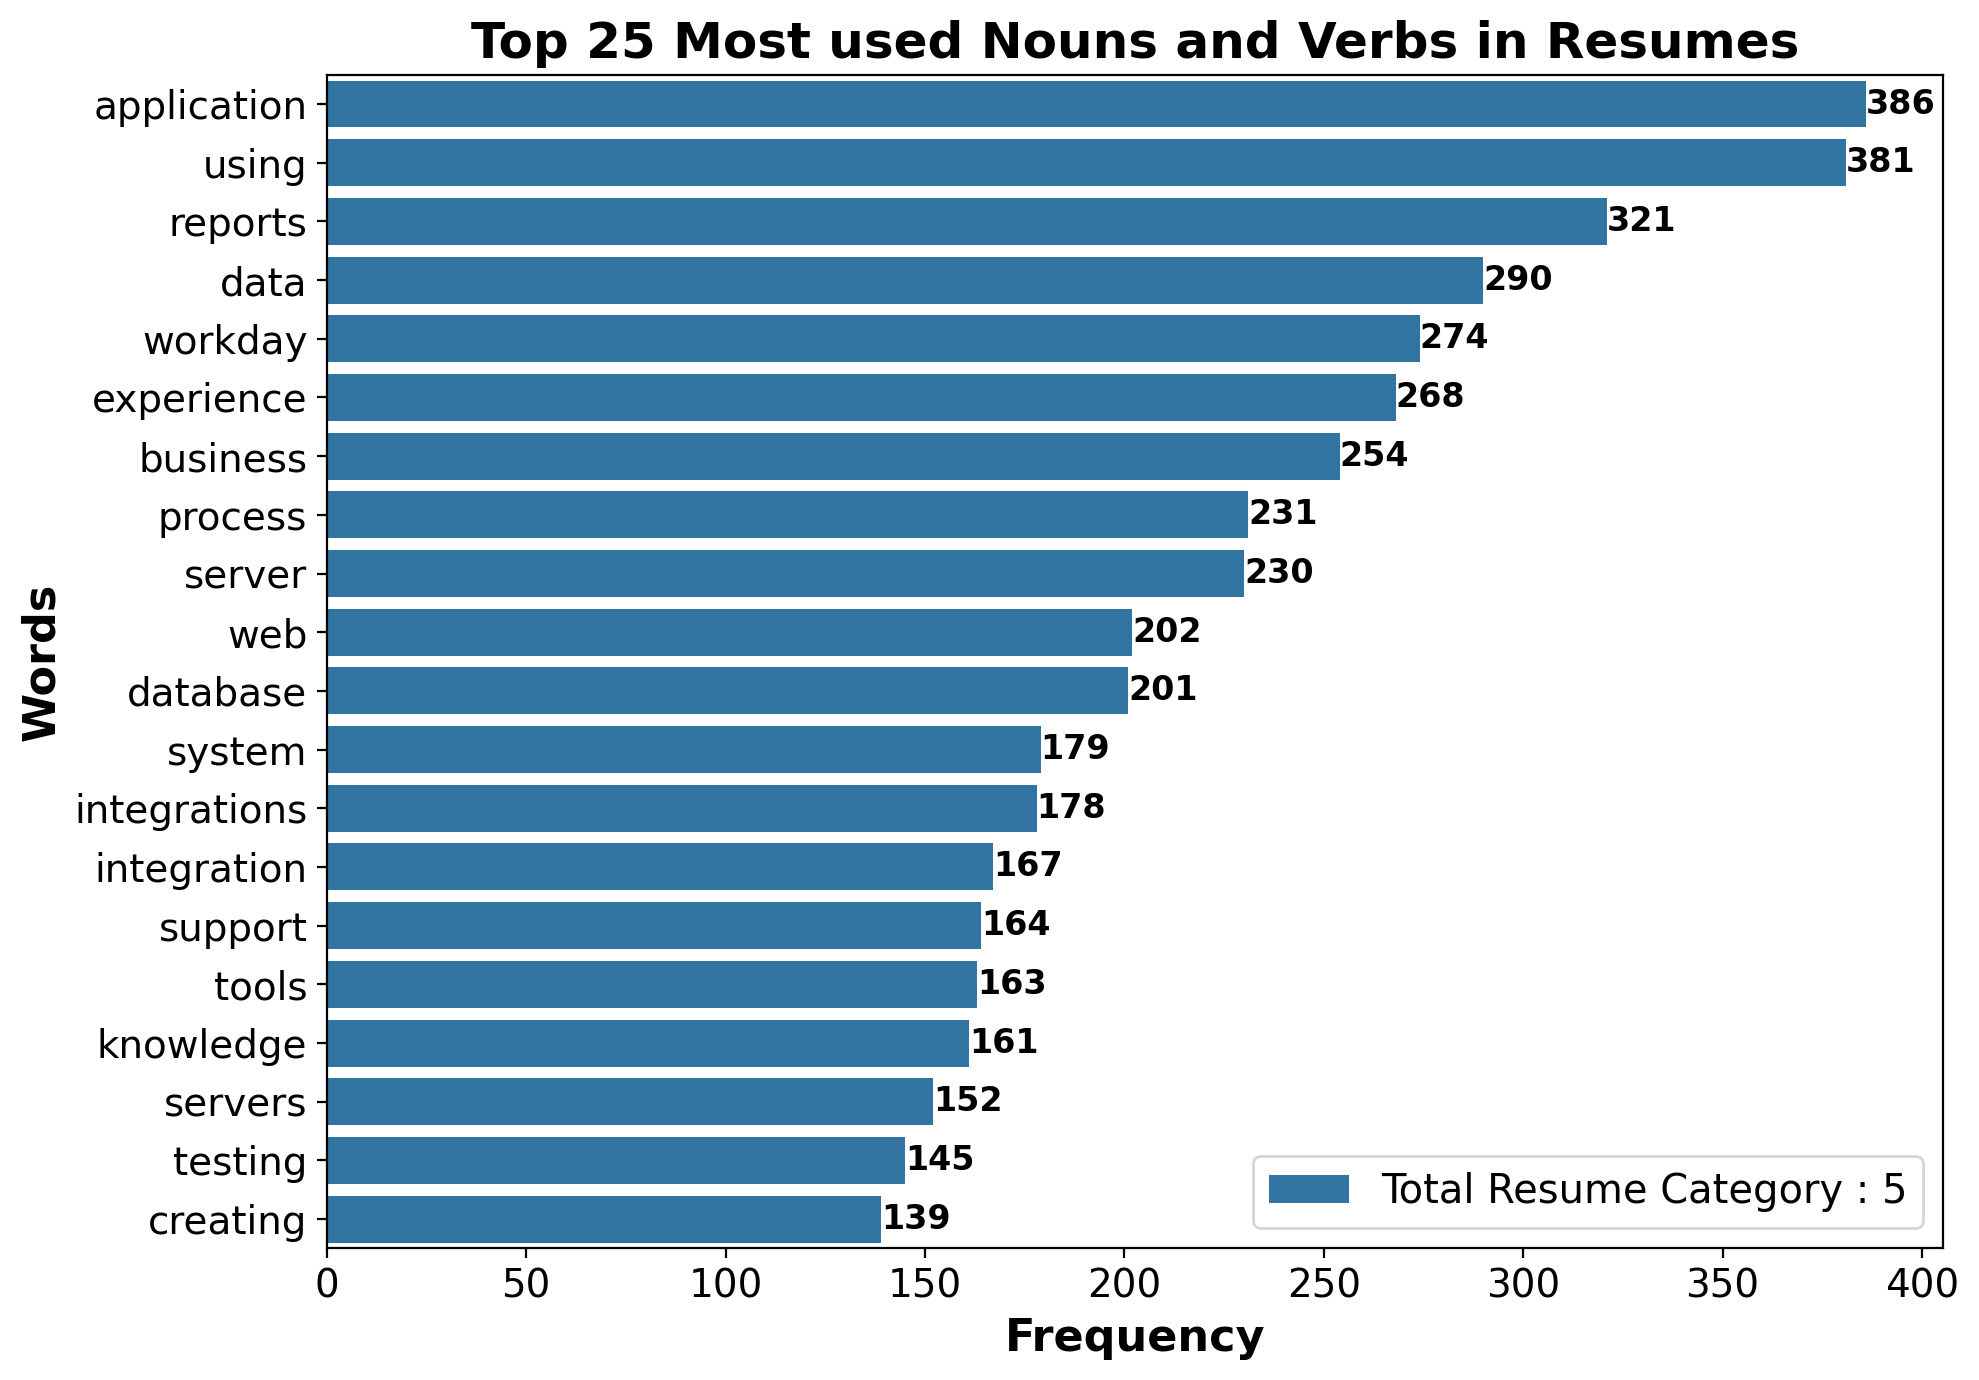

In [34]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Resume Category : {}'.format(len(resume_data['Resume_Category'].unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Nouns_Verbs_Bar', dpi = 500)

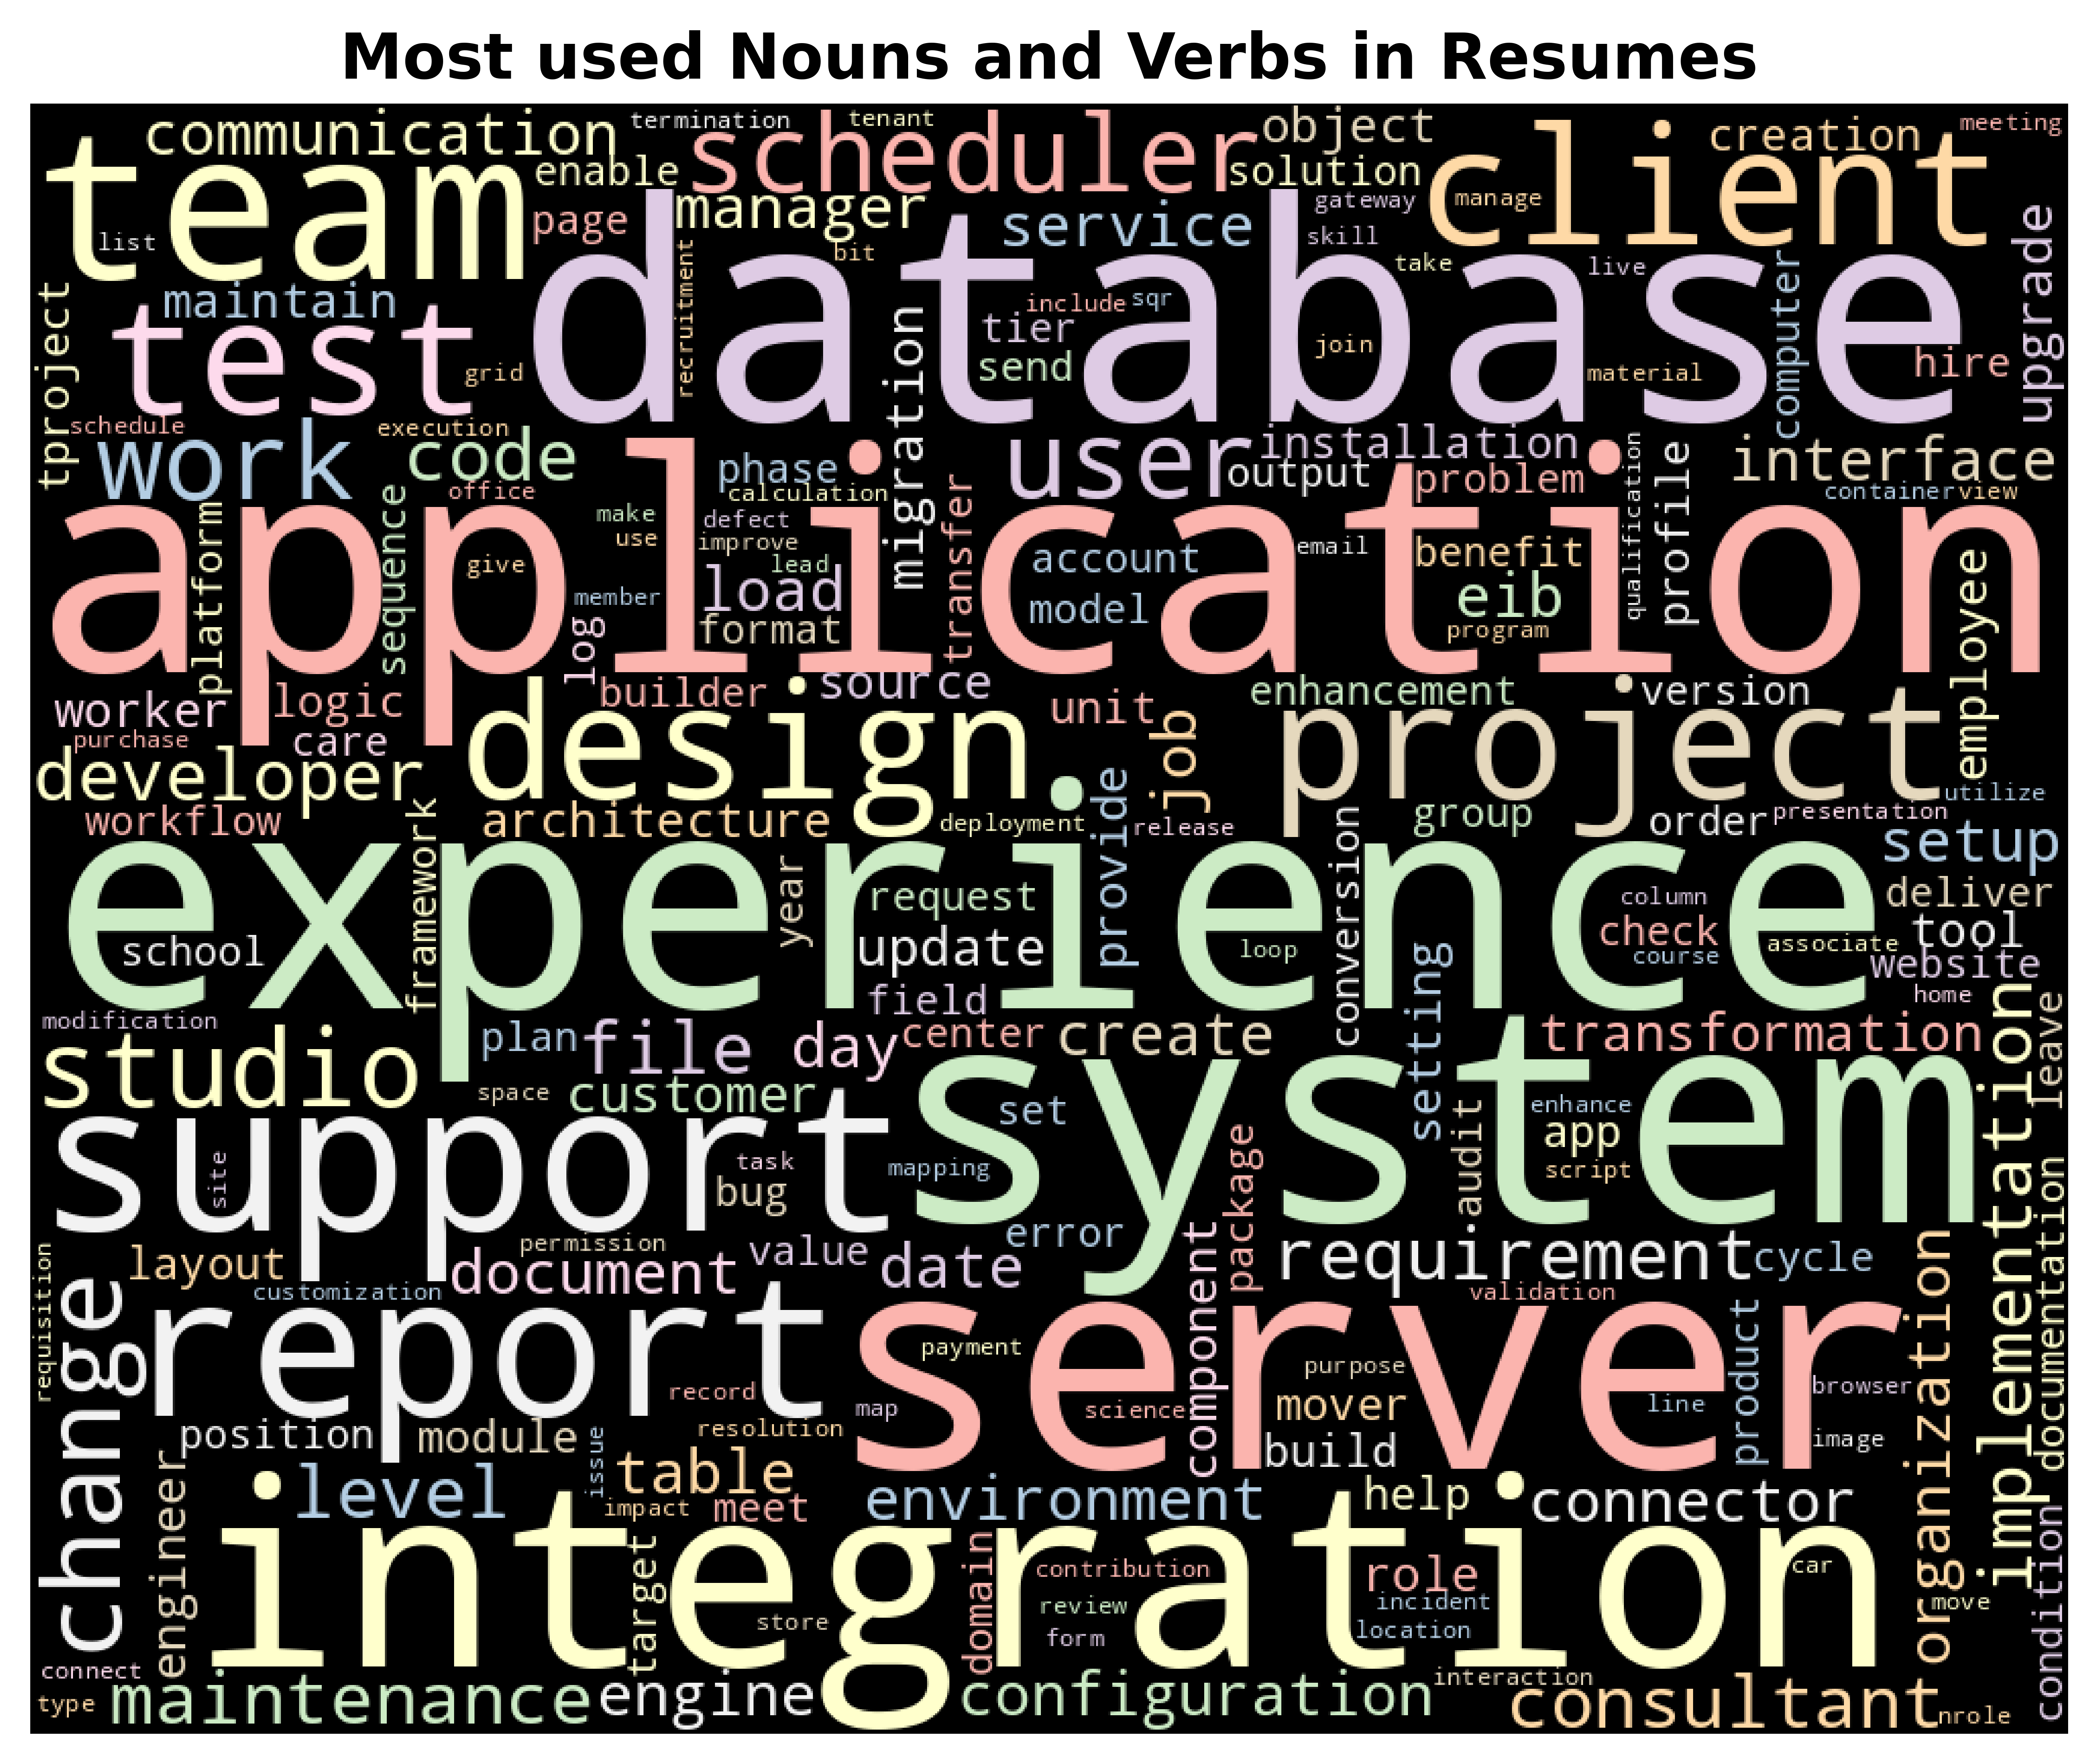

In [35]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds_Noun_Verb.png')
plt.show()

@@@@@ ##### $$$$$ EDA PART